In [26]:
import pandas as pd
from matplotlib import pyplot as plt

In [42]:

phd_stud   = pd.read_csv('all_studphd_inst.csv',index_col=0)

unique_unis = None
for year in range(2002, 2023): 
    year_data = phd_stud[phd_stud['Year']==year]
    if year == 2002: 
        unique_unis = set(year_data['Unit Id'].unique())
    else: 
        unique_unis_year = set(year_data['Unit Id'].unique())
        unique_unis = unique_unis.intersection(unique_unis_year)

phd_stud = phd_stud[phd_stud['Unit Id'].apply(lambda x: x in unique_unis)]

phd = phd_stud.groupby('Year')[[ 'grand_phd_total','black_phd_total','hispanic_phd_total','women_phd_total',\
                                 'total_phd_cs','black_phd_cs','hispanic_phd_cs','women_phd_cs', ]].sum()
phd['black_phd_cs']           = phd['black_phd_cs']/(phd['total_phd_cs'])
phd['hispanic_phd_cs']        = phd['hispanic_phd_cs']/phd['total_phd_cs']
phd['women_phd_cs']           = phd['women_phd_cs']/phd['total_phd_cs']
phd= phd.reset_index()
len(phd_stud['Unit Id'].unique())


15

In [41]:

stud = pd.read_csv('all_student_inst.csv')
unique_unis = None
for year in range(2002, 2023): 
    year_data = stud[stud['Year']==year]
    if year == 2002: 
        unique_unis = set(year_data['Unit Id'].unique())
    else: 
        unique_unis_year = set(year_data['Unit Id'].unique())
        unique_unis = unique_unis.intersection(unique_unis_year)

stud = stud[stud['Unit Id'].apply(lambda x: x in unique_unis)]

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total','women_total', \
                                  'total_cs','black_cs','hispanic_cs','women_cs', ]].sum()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud_set= stud_set.reset_index()
merged = pd.merge(phd, stud_set, on='Year')
merged
len(stud['Unit Id'].unique())

1668

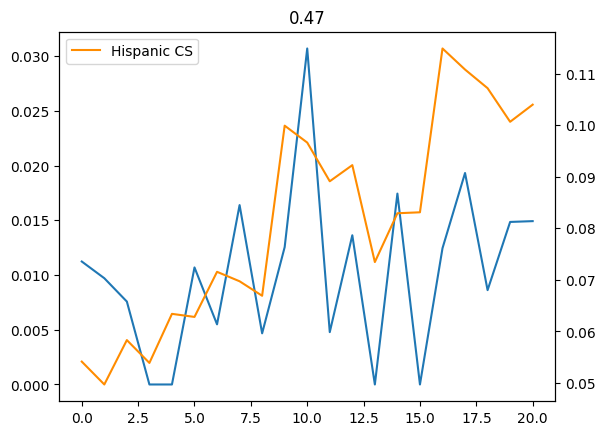

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['hispanic_phd_cs'],label="Hispanic CS-Phd")
plt.twinx()
plt.plot(merged.index, merged['hispanic_cs'],label="Hispanic CS",color='darkorange')
plt.title('Hispanic:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['hispanic_phd_cs'], merged['hispanic_cs'])[0], 2))
plt.legend()

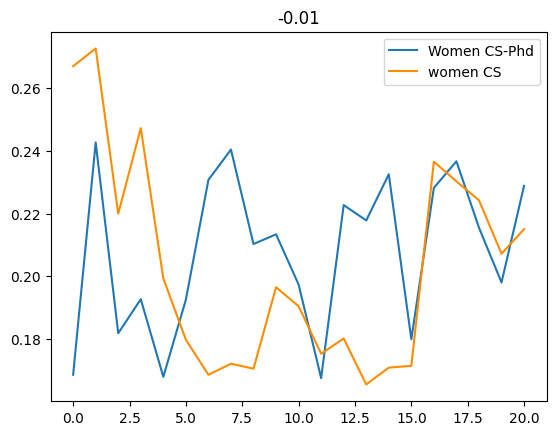

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['women_phd_cs'],label="Women CS-Phd")
# plt.twinx()
plt.plot(merged.index, merged['women_cs'],label="women CS",color='darkorange')
plt.title('Women:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['women_phd_cs'], merged['women_cs'])[0], 2))
plt.legend()

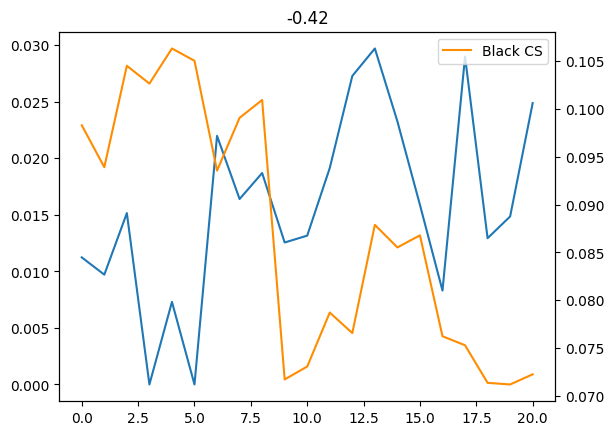

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
plt.plot(merged.index, merged['black_phd_cs'],label="Black CS-Phd")
plt.twinx()
plt.plot(merged.index, merged['black_cs'],label="Black CS",color='darkorange')
plt.title('Black:Orange: CS Student, Blue: PHD CS Student')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr 
plt.title(round(pearsonr(merged['black_phd_cs'], merged['black_cs'])[0], 2))
plt.legend()